# Matplotlib - Exercises
Welcome to this notebook on basic visualizations in matplotlib!

Matplotlib is a powerful library for creating visualizations in Python. It is widely used for data exploration and analysis, as well as for creating publication-quality graphics. In this notebook, we will cover the basics of creating simple visualizations using matplotlib. The exercises in this notebook are designed to help you build your skills in creating different types of plots, such as line plots, scatter plots, bar plots, and histograms. We will also cover topics such as customizing the appearance of plots, adding titles and labels, and working with multiple subplots. By the end of this notebook, you should have a good understanding of how to use matplotlib to create simple visualizations, and you will be ready to explore more complex plots and visualizations on your own. 

**Let's get started!**

#### Package imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Part 1: Time Series Analysis
The focus of the first part of this notebook will be time series plots, which are used to show how data changes over time.

The dataset used in this part of the notebook is the collapse of the big tech stocks due to the interest rate hikes of the Federal Reserve. This dataset includes daily prices of some of the biggest technology stocks. We will use this dataset to visualize the changes in stock prices over time, and to explore the impact of the Federal Reserve's interest rate hikes on these companies.

Through this exercise, you will learn how to create and customize line plots, and how to add titles, labels, and annotations to your visualizations.

#### Loading data

In [2]:
big_tech_returns = pd.read_csv('https://kuleuven-mda.s3.eu-central-1.amazonaws.com/big_tech_returns.csv')
fed_hikes = pd.read_csv('https://kuleuven-mda.s3.eu-central-1.amazonaws.com/fed_hikes.csv', sep=';').dropna()

big_tech_returns.Date = pd.to_datetime(big_tech_returns.Date)
big_tech_returns.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2022-01-03,62.900002,63.349998,62.500000,63.160000,60.752422,17184300,CSCO
1,2022-01-04,62.439999,62.810001,61.110001,61.250000,59.262394,29682500,CSCO
2,2022-01-05,61.189999,61.639999,60.250000,60.279999,58.323872,30317900,CSCO
3,2022-01-06,60.000000,61.130001,59.910000,60.919998,58.943100,19616600,CSCO
4,2022-01-07,60.869999,61.500000,60.669998,61.130001,59.146290,20152400,CSCO


**Task 1**: create a separate dataframe consisting of only the stock returns from Microsoft. Do this by subsetting the data based on the value 'MSFT' in the column 'Ticker'. Store the dataframe in a variable named microsoft_returns. Make sure to create a copy of the subsetted dataframe.

In [3]:
microsoft_returns = big_tech_returns[big_tech_returns.Ticker == 'MSFT'].copy()

**Task 2**: create a lineplot of the Adjusted Close 'Adj Close'. The x-axis should be the date. Make the color equal to the following hex code: #457b9d.

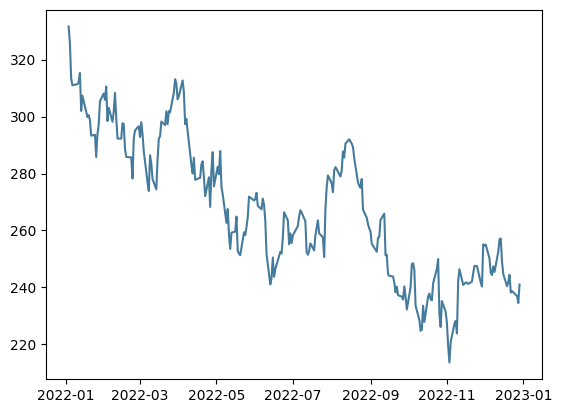

In [4]:
plt.plot('Date', 'Adj Close', data=microsoft_returns, color='#457b9d');

**Task 3**: Give the axes a descriptive name and provide a title to the plot.

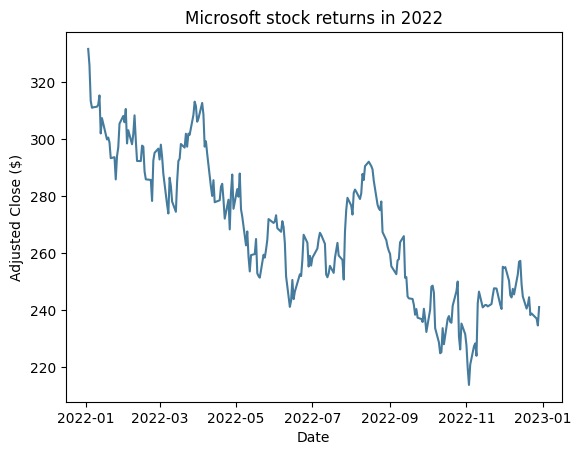

In [5]:
plt.plot('Date', 'Adj Close', data=microsoft_returns, color='#457b9d');
plt.xlabel('Date')
plt.ylabel('Adjusted Close ($)')
plt.title('Microsoft stock returns in 2022');

**Task 3**: the pandas library is specialized in time series analysis. It is possible to create a matplotlib lineplot directly from a pandas Series. to do this, the data should be equal to the index of the pandas Series. then, the .plot() function can be called on the pandas Series. Generate the same graph using the pandas library directly.

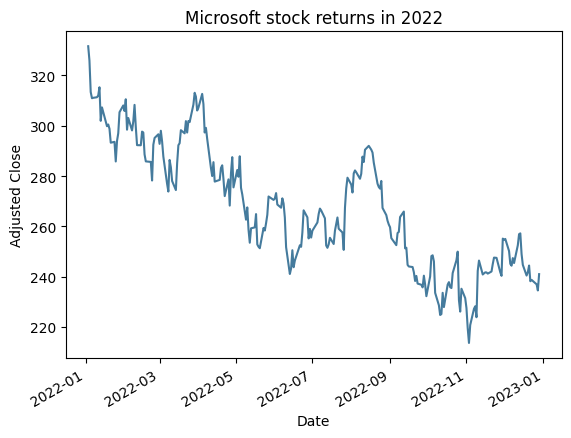

In [6]:
microsoft_adjusted_close = microsoft_returns.set_index('Date', drop=True)['Adj Close'].rename('Microsoft')
microsoft_adjusted_close.plot(
    title='Microsoft stock returns in 2022', 
    xlabel='Date', 
    ylabel='Adjusted Close',
    color='#457b9d'
);

**Task 4**: add red (#e63946) vertical lines to the figure above that indicate when a fed rate hike took place. Make the opacity of the line equal to 0.2, and add a text annotation indicating the size of the rate hike. Anchor the y-value of the text annotation to the maximum close - 10. Color the text annotation red (#e63946), format it such that it is always expressed by two numbers after the comma, and rotate the label 90 degrees.

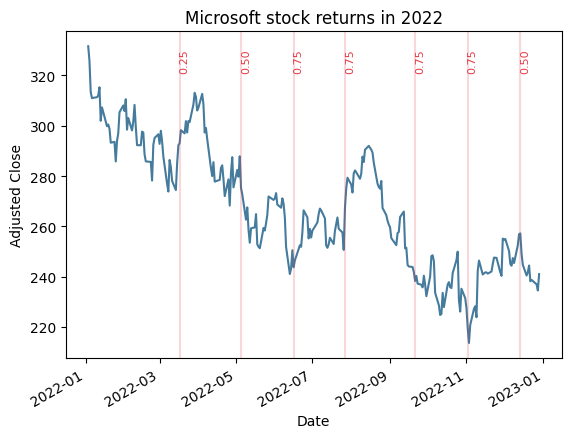

In [7]:
microsoft_adjusted_close.plot(
    title='Microsoft stock returns in 2022', 
    xlabel='Date', 
    ylabel='Adjusted Close',
    color="#457b9d"
)
max_close = microsoft_adjusted_close.max()

for _, hike in fed_hikes.iterrows():
    date = pd.to_datetime(hike['Date'], dayfirst=True)
    plt.axvline(x=date, c='#e63946', alpha=0.2)
    rate_change = hike['Rate Change (bps)']
    plt.text(date, max_close - 10, f'{rate_change:.2f}', rotation=90, color='#e63946', size=8)
plt.show()

**Task 5**: add a legend to the plot

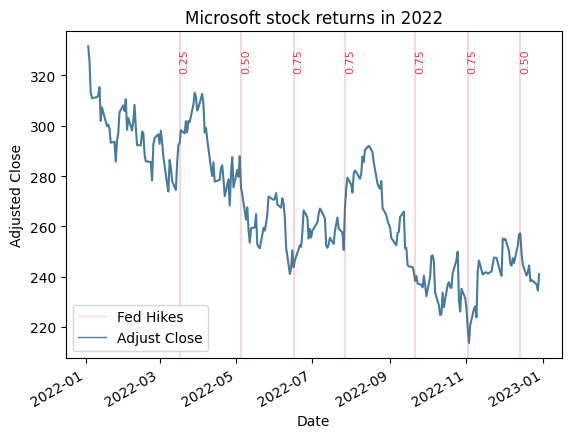

In [8]:
from matplotlib.lines import Line2D

microsoft_adjusted_close.plot(
    title='Microsoft stock returns in 2022', 
    xlabel='Date', 
    ylabel='Adjusted Close',
    color="#457b9d"
)
max_close = microsoft_adjusted_close.max()

for _, hike in fed_hikes.iterrows():
    date = pd.to_datetime(hike['Date'], dayfirst=True)
    plt.axvline(x=date, c='#e63946', alpha=0.2)
    rate_change = hike['Rate Change (bps)']
    plt.text(date, max_close - 10, f'{rate_change:.2f}', rotation=90, color='#e63946', size=8)

custom_lines = [Line2D([0], [0], color="#e63946", lw=1, alpha=0.2),
                Line2D([0], [0], color="#457b9d", lw=1)]

plt.legend(custom_lines, ['Fed Hikes', 'Adjust Close'])
plt.show()

**Task 6**: make the same plot, but now visualize both the stock returns of Microsoft ('MSFT') and Apple ('AAPL'). Make sure the legend is also updated. The color of the Apple stock returns should be #a8dadc. Rebase the apple stock return such that it has the same starting value as the microsoft stock returns.

In [9]:
apple_returns = big_tech_returns[big_tech_returns.Ticker == 'AAPL'].copy()
apple_adjusted_close = apple_returns.set_index('Date', drop=True)['Adj Close'].rename('Apple')
apple_adjusted_close = (apple_adjusted_close / apple_adjusted_close.values[0])*microsoft_adjusted_close.values[0]

adjusted_closes = pd.concat([apple_adjusted_close, microsoft_adjusted_close], axis=1)


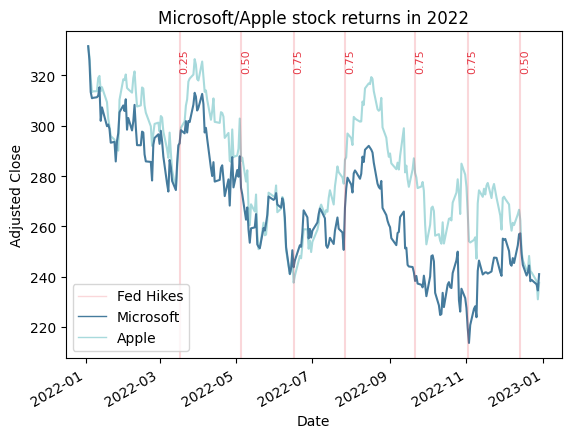

In [10]:
adjusted_closes.plot(
    title='Microsoft/Apple stock returns in 2022', 
    xlabel='Date', 
    ylabel='Adjusted Close',
    color=["#a8dadc", "#457b9d"]
)

for _, hike in fed_hikes.iterrows():
    date = pd.to_datetime(hike['Date'], dayfirst=True)
    plt.axvline(x=date, c='#e63946', alpha=0.2)
    rate_change = hike['Rate Change (bps)']
    plt.text(date, max_close - 10, f'{rate_change:.2f}', rotation=90, color='#e63946', size=8)

custom_lines = [Line2D([0], [0], color="#e63946", lw=1, alpha=0.2),
                Line2D([0], [0], color="#457b9d", lw=1),
               Line2D([0], [0], color="#a8dadc", lw=1)]

plt.legend(custom_lines, ['Fed Hikes', 'Microsoft', 'Apple'])
plt.show()

## Part 2: High School Basketball Budgets
This dataset provides information on the budget and revenue of high schools associated with basketball in the United States. The data is broken down by gender, with separate columns for male and female athletes. The dataset can be used to explore the relationship between a school's budget and revenue for basketball programs, and to compare the funding of male and female programs. This information can be useful for evaluating the financial viability of high school sports programs, and for identifying areas where funding may be lacking.

In this section, we will focus on creating three different types of visualizations: donut charts, boxplots, and scatter plots. These visualizations can be used to represent data in a clear and concise manner, making it easier to understand patterns and trends. The datasets used in this section contains data on high schools and their associated basketball burgets for male and female athletes.

In [11]:
basketball_budgets = pd.read_csv('https://kuleuven-mda.s3.eu-central-1.amazonaws.com/basketball_budgets.csv')
basketball_budgets.head()

,index,year,institution_name,state_cd,rev_men,rev_women,exp_men,exp_women,sports
0,70160,2019,Alabama A & M University,AL,1382143.0,1289349.0,1567122.0,1387755.0,Basketball
1,70172,2019,University of Alabama at Birmingham,AL,3705028.0,1925441.0,3705028.0,1925441.0,Basketball
2,70210,2019,University of Alabama in Huntsville,AL,572018.0,442794.0,572018.0,442794.0,Basketball
3,70248,2019,Alabama State University,AL,966118.0,762216.0,966118.0,762216.0,Basketball
4,70286,2019,The University of Alabama,AL,14722223.0,1008558.0,9429628.0,3805848.0,Basketball


**Task 1**: create a scatter plot that compares the log expenses of men basketball teams to the log expenses of women basketball teams (exp_women). You can use the default matplotlib color. Set the size of the markers equal to 2 and the opacity equal to 0.2. Don't forget the labels and title.

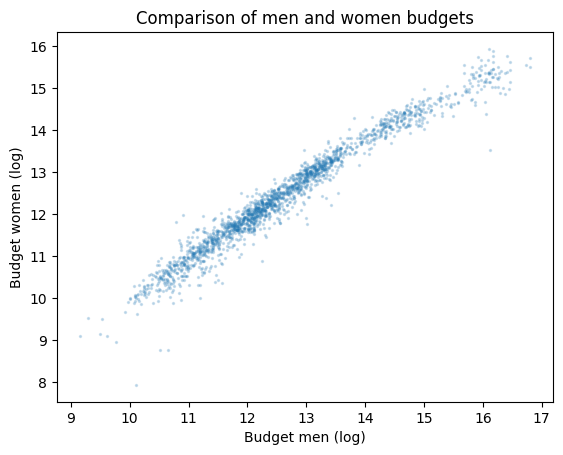

In [12]:
basketball_budgets.loc[:, 'log_exp_men'] = np.log(basketball_budgets.exp_men)
basketball_budgets.loc[:, 'log_exp_women'] = np.log(basketball_budgets.exp_women)

plt.scatter(
    x='log_exp_men', 
    y='log_exp_women', 
    data=basketball_budgets, 
    s=2,  
    alpha=0.2
)
plt.xlabel('Budget men (log)')
plt.ylabel('Budget women (log)')
plt.title('Comparison of men and women budgets');

**Task 2**: create a pie chart for the 'Columbus State Community College' that shows the budgets for men and women. Make sure that text annotations are also added in the slices of the pie chart that indicate the percentage.

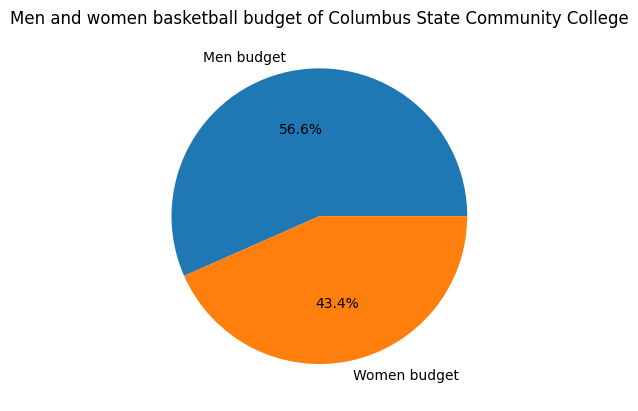

In [13]:
school = basketball_budgets[
    basketball_budgets.institution_name == 'Columbus State Community College'].to_dict(orient='records')[0]

school_name = school['institution_name']
plt.pie([school['exp_men'], school['exp_women']], labels=['Men budget', 'Women budget'], autopct='%1.1f%%')
plt.title(f'Men and women basketball budget of {school_name}');

**Task 3**: Create a boxplot comparing the basketball budgets for men and women.

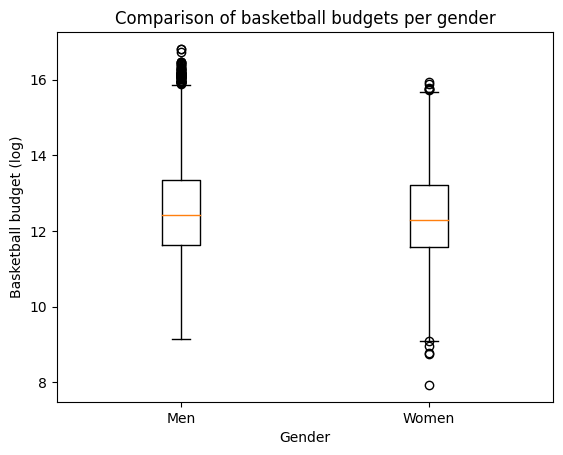

In [14]:
data = {'Men' : basketball_budgets.log_exp_men, 
        'Women': basketball_budgets.log_exp_women}

fig, ax = plt.subplots()
ax.boxplot(data.values())
ax.set_xticklabels(data.keys())

plt.xlabel('Gender')
plt.ylabel('Basketball budget (log)')
plt.title('Comparison of basketball budgets per gender');